# Análisis de sentimientos de Twitter.
## Álgoritmo supervisados de clasificación.

### Autor: Francisco Correa.       

---

## <u>Preliminares</u>

### Descripción del problema.

El objetivo de este reporte es poder clasificar si un tweet es positivo o negativo en relación al sentimiento asociado al texto. Esto quiere decir que sé dará solución a un problema de __clasificación__ utilizando machine learning.<br>
El problema se abordará con 5 modelos de clasificación distintos para poder tener un mejor comparativo de qué modelo utilizar para abordar correctamente el problema. Los algoritmos que se utilizarán serán los siguientes:<br>

* Random Forest.
    - Parámetros:
    <ol>
    <li> max_features: 'auto', 'sqrt', 'log2'</li>
    <li> max_depth: max_depth: np.linspace(10, 1200, 4) --> 10, 407, 803, 1200
    </ol>
<br>

* Árboles de decisión.
    - Parámetros:
    <ol>
    <li> max_features: 'auto', 'sqrt', 'log2'</li>
    <li> max_depth: max_depth: np.linspace(10, 1200, 4) --> 10, 407, 803, 1200
    <li> min_samples_split: 2, 5, 15</li>
    </ol>
    <br>

* Naive Bayes.
    - Parámetros:
    <ol> 
    <li>alpha: 0.01, 0.1, 1</li>
    <li>fit_prior: True, False</li>
    <li>class_prior: None, 1, 5, 10</li>
    </ol>
<br>

* AdaBoost.
    - Parámetros:
    <ol>
    <li>learning-rate: 0.01, 0.1, 0.5, 1</li>
    <li>n_estimators: 50, 100, 500</li>
    </ol>
<br>

* GradientBoost.
    - Parámetros:
    <ol>
    <li>learning-rate: 0.01, 0.1, 0.5, 1</li>
    <li>n_estimators: 50, 100, 500</li>
    </ol>

Se espera poder contar con un modelo suficientemente balanceado para que sea capaz de predecir exitosamente si un tweet es positivo o negativo a través de nuevos datos que no sean parte del conjunto de test.

### Caracteristicas de la base de datos.

La base de datos con la que vamos a trabajar se llama __Text Emotion__ con 40.000 filas y 4 columnas. Los atributos de esta base son:
* **tweet id:** Es el identificador del tweet.
* **sentiment:** Es el sentimiento que se rescata del tweet.
* **author:** Es el autor que publicó el tweet,
* **content:** Es el contenido que escribió el autor.

El vector objetivo de esta base es "sentiment", donde puede ser positivo, como fun y love y negativo, como sadness y hate. Hay también sentimientos neutros. Los sentimientos son empty, sadness, enthusiasm, neutral, worry, surprise, love, fun, hate, happiness, boredom, relief y anger

### Solución al problema.

Para darle solución a este problema, debemos seguir los siguientes pasos:
#### Limpieza de datos.
* Eliminar las filas que contengan valores NaN.
* El vector objetivo, en este caso, sentiment, será expresado en binario: 1 para los sentimientos positivos y 0 para los negativos.
* Los sentimientos neutros convertirlos a positivos o negativos de manera aleatoria.

#### Análisis exploratorio de los datos.
* Gráficamos y analizamos los datos para saber si hay algún patrón en común.
* Analizar los gráficos y tablas estadísticas. Ver las principales características de los tweets positivos y negativos.

#### Feature Engineering
* Se eliminan las palabras que no sirven para la predicción, como páginas web, usuarios y otras que no aportan al modelo.
* Se eliminan las palabras únicas.
* Se aplica un autocorrector a todas las palabras para que no existan más de dos palabras con la misma semántica.

#### Modelación
* Para el preprocesamiento, se dividirá la base en conjunto de entrenamiento y test con train_test_split de sklearn. El tamaño del conjunto de test será de 0.33 y el de train será de 0.66.
* Crearemos 5 modelos de clasificación para determinar cuál tiene mejor poder de predicción. En la primera parte se utilizarán modelos vainilla (parámetros por defecto) y luego se aplicará una búsqueda para encontrar los mejores hiperparámetros de cada uno utilizando GridSearchCV.
* Medir la eficiencia del modelo con un reporte de clasificación.
* Conclusiones finales.
<br><br>

Los mejores modelos serán aquellos que superen el siguiente benchmark:
* Accuracy: 0.63
* Precision (clase 1): 0.72

## <u>Aspectos computacionales</u>

* Python versión 3.7.6
* Anaconda versión 2020.02
* Conda versión 4.8.3
* Librerías:
<ul>
    <li>pandas 1.0.1</li>    
    <li>numpy 1.18.1</li>
    <li>seaborn 0.10.0</li>
    <li>matplotlib 3.1.3</li>
    <li>scikit-learn 0.22.1</li>
    <li>nltk versión 3.4.5</li>
    <li>joblib versión 0.14.1</li>
</ul>

Descripción de las librerías clásicas a utilizar:<br><br>
**Pandas**:<br> Facilita la lectura de datasets o conjunto de datos (dataframe), estadísticas básicas y operaciones básicas como subconjuntos de dataframe, concadenar dos datasets, poblamiento de datos, entre otros (https://pandas.pydata.org/)
		
**Numpy**:<br> Equivalente de MatLab en entorno de Python. Sirve para trabajar con matrices (imágenes, sonidos y videos, se pueden mapear a matrices). También sirve para hacer simulaciones creando data aleatoria. Ve todo lo que es cálculo lineal (https://numpy.org/)

**Matplotlib**:<br> Se utiliza para realizar representaciones gráficas en 2D y 3D y modificarlas a voluntad. (https://matplotlib.org/)
		
**Seaborn**:<br> Se utiliza para realizar gráficos complejos con pocas líneas de código. Esta hecho en base a matplotlib. (https://seaborn.pydata.org/)
		
**Scikit-learn**:<br> Se usa para hacer análisis predictivos o modelos predictivos. Tiene una gran colección de algoritmos del mundo de la ciencia de datos. Esta basado en base a pandas, numpy y matplotlib. Se involucran técnicas estadísticas como regresión lineal, regresión logística, clustering y algoritmos de clasificación. Nos da métodos muy concisos para predecir el valor de salida y formas para medir la eficiencia de esas salidas. Especificamente la utilizaremos para modelar con Naive Bayes. (https://scikit-learn.org/stable/).

**NLTK**:<br> Es utilizado para procesar lenguaje natural. Se utiliza para segmentación de tópicos, tokenización, análisis de sentimiento, categorización de palabras (adjetivo, verbo, sustantivo), entre otras funciones. (https://www.nltk.org/)

**Word_processor** <br> Librería que cree para poder preprocesar las palabras en twitter eliminando el ruido como la puntuación, palabras en mayúscula, direcciones web, usuarios, entre otros. Dentro de esta librería se utilizará otra librería para correguir las palabras con errores ortográficos llamada **spell.py**. Pueden encontrar más infomación de esta librería en el siguiente link: https://norvig.com/spell-correct.html

**Re** <br> Librería de expresiones regulares utilizada para encontrar patrones en una cadena de texto. (https://docs.python.org/2/library/re.html).

**Collection** <br>
Librería que nos ayuda a trabajar con colecciones o estructuras de datos, como listas, tuplas y diccionarios. Tienen funciones incorporadas que facilitan el flujo de programación. (https://docs.python.org/2/library/collections.html)

**Joblib** <br>
Librería que sirve para serializar variables de cualquier tipo para que podamos acceder a ellas con tan solo importarlas. Es muy util cuando tengamos que acceder a modelos desde otros trabajos o para no tener que volver a ejecutar un modelo. (https://joblib.readthedocs.io/en/latest/)

## <u>Análisis Exploratorio</u>

En esta sección realizaremos lo siguiente:
* Importar las librerías necesarias para este análisis.
* Limpieza de datos.
* Modificar la variable objetivo para que quede con dos valores: cero y uno.
* Graficar

### I. Importe de librerías

Primero, importamos las librerías necesarias para realizar todo el análisis necesario para resolver este problema de clasificación.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.filterwarnings("ignore")
import word_processor as wp
from collections import Counter

In [2]:
df = pd.read_csv("text_emotion.csv")

In [3]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


### II. Limpieza de datos

Para el análisis exploratorio, primero veremos si nuestro dataset contiene datos pérdidos para quitarlos o reemplazarlos por otro valor según sea el caso.

In [4]:
df.isna().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

Como no hay casos NA, trabajaremos con la base tal como está y solo modificaremos la variable objetivo a continuación.

### III. Variable objetivo.

En este apartado realizaremos una estrategia para poder cambiar la variable "neutro" dentro de nuestro vector objetivo y que sea parte de los atributos positivos o negativos en un tweet.

Este es el gráfico de la variable objetivo por el momento.

Text(0, 0.5, 'Frequency')

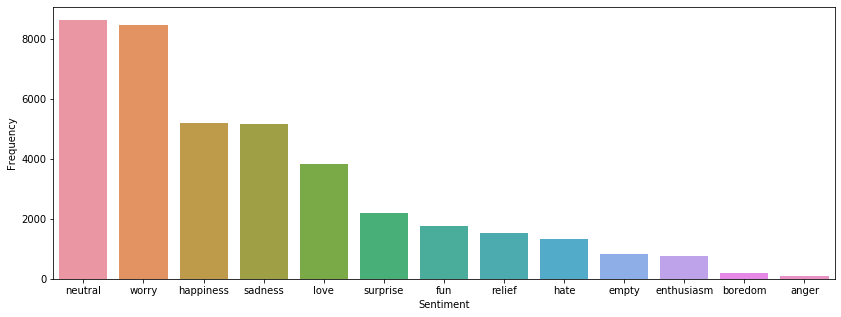

In [5]:
plt.figure(figsize=(14, 5))
freq = df["sentiment"].value_counts()
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
sns.barplot(x=freq.index, y=freq)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")

Dejamos los tweets como sentimientos positivos y negativos según corresponda. El objetivo es dejar todos los tweets como una distribución binaria (unos y ceros). Por el momento la distribución se ve así:

In [6]:
df["sentiment"].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

Vemos que tenemos varios sentimientos, siendo neutral el principal. Para tener una idea de cuántos sentimientos tenemos como buenos y malos vamos a transformar los datos del vector objetivo. Los sentimientos que son neutrales los vamos a cambiar de manera aleatoria entre unos y ceros utilizando una distribución de Bernoulli.

In [7]:
sentiment = {
    "happiness": 1,
    "love": 1,
    "surprise": 1,
    "fun": 1,
    "relief": 1,
    "enthusiasm": 1,
    "worry": 0,
    "sadness": 0,
    "hate": 0,
    "empty": 0,
    "boredom": 0,
    "anger": 0
}

df = df.replace({"sentiment":sentiment})

A continuación cambiamos los tweets de manera aleatoria siguiendo una distribución de Bernoulli.

In [8]:
# Reemplazamos los neutros de manera aleatoria.

for n, i in enumerate(df["sentiment"]):
    if i == "neutral":
        df.loc[n, "sentiment"] = np.random.binomial(size=1, n=1, p= 0.5)[0]

Volvemos a graficar para saber como se distribuyen los tweets positivos y negativos.

Text(0, 0.5, 'Frequency')

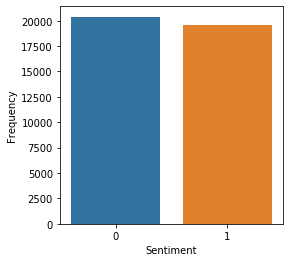

In [9]:
plt.figure(figsize=(4, 4))
freq = df["sentiment"].value_counts()
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
sns.barplot(x=freq.index, y=freq)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")

Vemos que la distribución entre ambas categorías en bien balanceada, lo que no no dará problemas de sesgo a la hora de realizar el modelo.

Ahora que ya hemos indagado en el vector objetivo, indagemos en el vector independiente: el contenido o tweets de los usuarios, según frecuencia de palabras utilizadas.

In [10]:
tweets = ' '.join(df["content"].to_list()).split()
counts = Counter(tweets).most_common()

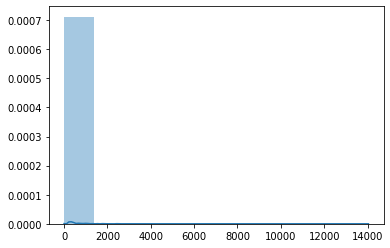

In [11]:
freq = [x[1] for x in counts]
sns.distplot(freq, bins=20)

Vemos que los datos están demasiado sesgados, es decir, hay muchísimas palabras que se repiten una o dos veces. Esto lo podemos comprobar con un análisis numérico.

In [12]:
count = 0
for k, v in counts:
    if v == 1:
        count += 1
print(count / len(counts))

0.7434961643276469


El **74,3%** de las palabras solo aparece una sola vez en todos los tweets, lo que puede significar lo siguiente:
* Hay muchas palabras mal escritas.
* En muchos casos hay URL, hashtag o usuarios.
* Hay muchos simbolos o números junto con las palabras

Esto lo tenemos que combatir eliminando esas palabras que hacen que el sesgo de los tweets sea tan alto. 

Ahora haremos el siguiente análisis exploratorio: Vamos a seleccionar las palabras que más se repiten (las que podrían tener más incidencia al momento de predecir si un tweet es positivo o negativo) y veremos que tan positivas o negativas son. Esto lo haremos a través de los siguientes pasos:
* Seleccionamos a través de un index las palabras más frecuentes.
* Buscamos en los indices en donde estas palabras se encuentran
* Con value_counts veremos la frecuencia relativa con respecto a los tweets positivos.
* Agregamos ese dato en una lista y graficamos.

In [13]:
most_freq_words = [x[0] for x in counts][:50]
words_sentiments = []
for word in most_freq_words:
    a = df.index[df['content'].str.contains(word)]
    ws = df.loc[a, "sentiment"]
    positive = ws.value_counts("%").get(1)
    words_sentiments.append(positive)

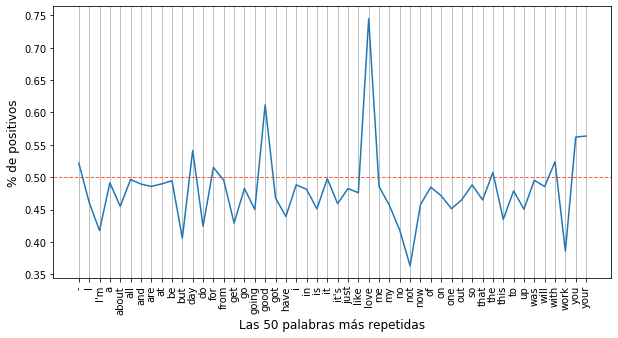

In [14]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.xlabel("Las 50 palabras más frecuentes", fontsize=12)
plt.ylabel("% de positivos", fontsize=12)
plt.axhline(0.5, color = "tomato", lw = 1, linestyle="--")
plt.grid(axis="x")
sns.lineplot(most_freq_words, words_sentiments)

Como podemos ver en el gráfico anterior, hay palabras claves que nos ayudarán a determinar si un tweet es positivo o negativo. Las palabras que más afectan para esta decisión son:
* love (positivo)
* good (positivo)
* work (negativo)
* not (negativo

## <u>Feature engineering.</u>

En esta sección realizamos todos las transformaciones que nuestra base necesita para poder implementar un modelo apropiado. <br>
Realizaremos los siguientes puntos o transformaciones:
* Eliminamos las columnas que no necesitamos.
* Eliminación de ruido en los tweets, como usuarios, páginas web, entre otros.
* Transformación de palabras y correcciones.
* Realizar un countvectorizer para incluirlo en los modelos.

### I. Eliminación de columnas innecesarias.

A continuación eliminamos las columnas innecesarias para este modelo. En este caso eliminamos el autor del tweet y su ID que a decir verdad no aporta en nada a la predicción de si un tweet es positivo o negativo

In [15]:
df = df.drop("author", axis=1)
df = df.drop("tweet_id", axis=1)

### II. Eliminación del ruido.

A continuación vamos a eliminar las palabras o carácteres que hacen ruido. Esto lo efectuaremos en un orden determinado para no quedarnos con palabras o letras que no corresponden. Por ejemplo, si eliminamos primero los símbolos como \"@\" antes de la eliminación de los usuarios, nos quedariamos con todos los usuarios sin el signo \"@\". Por eso el orden de los procesos es extremandamente importante y es el siguiente:
    <ol>        
        <li> Se remueven los usuarios, los hashtags y otras palabras que se anteponen con el símbolo &, como &amp o &quote</li>
        <li> Convertimos todas las letras a minúsculas </li>
        <li> Se remueven todas las direcciones web.</li>
        <li> Se remueven todos los símbolos, tales como ?\\^, etc.</li>
        <li> Se remueven los números que están fuera de las palabras y no dentro. Esto se hace para no eliminar los acrónimos  como por ejemplo J4F (just for fun), porque tienen una semántica.</li>
        <li> Se eliminan las palabras menores que tres letras que en general serían conectores o palabras sin importancia.</li>
        <li> Se eliminan las vocales excesivas en las palabras, como loooove y duuuude a un mínimo de dos vocales. Esto para que palabras como sweet no quede en swet. Luego con el autocorrector que implementaré más adelante corregirá esas palabras a su manera correcta. Esto lo haremos de esta forma, porque por ejemplo looooove en el autocorrector no arroja ningún resultado, pero con loove el autocorrector lo corrigue correctamente a love.</li>
        <li> Se aplica autocorrector en todas las palabras. </li>
        <li> Se remueven las palabras que solo se repiten una vez entre todos los tweets</li>
    </ol>

En las siguientes celdas utilizaremos una librería creada por nosotros llamada word_processor con el objetivo de limpiar el ruido de la base.

In [16]:
%%time

for n, i in enumerate(df["content"]):
    r1 = wp.replace_users(i)
    r2 = wp.remove_url(r1)
    r3 = wp.remove_symbols(r2)
    r4 = wp.remove_numers_out(r3)
    r5 = wp.remove_short_words(r4)
    df.loc[n, "content"] = r5

Wall time: 22.4 s


Borramos el uso de vocales excesivas.

In [17]:
for n, i in enumerate(df["content"]):
    replaced = wp.remove_extra_vowels(i)
    df.loc[n, "content"] = replaced

Se aplica un autocorrector. Este proceso toma una hora y cuarto en mi computador.

In [18]:
%%time
for n, i in enumerate(df["content"]):
    replaced = wp.autocorrect_words(i)
    df.loc[n, "content"] = replaced

Wall time: 1h 24min 3s


Por último, eliminamos las palabras únicas a lo largo de todos los tweets.

In [19]:
# Eliminamos las palabras que no se repiten en todos los tweets
# Son en su mayoria palabras inexistentes o con errores ortograficos, expresiones, etc.
import re

delete = '|'.join([k for k,v in counts if v == 1])
delete = re.sub(r'[()]', " ", delete)

In [20]:
%%time
for n, i in enumerate(df["content"]):
    try:
        r = wp.delete_unique_words(i, delete)
    except:
        continue
    df.loc[n, "content"] = r1

Wall time: 1min 22s


Aquí tenemos las palabras más repetidas en primera instancia, sin convertirlas a matriz con CountVectorizer todavía.

In [21]:
tweets = ' '.join(df["content"].to_list()).split()
counts = Counter(tweets).most_common()
counts

[('the', 13361),
 ('you', 7800),
 ('and', 7450),
 ('for', 5361),
 ('that', 4527),
 ('have', 3843),
 ('but', 3473),
 ('just', 3234),
 ('day', 3221),
 ('with', 2993),
 ('not', 2808),
 ('was', 2772),
 ('can', 2689),
 ('all', 2421),
 ('good', 2356),
 ('this', 2289),
 ('now', 2215),
 ('out', 2182),
 ('like', 2065),
 ('get', 2031),
 ('are', 1974),
 ('too', 1935),
 ('your', 1712),
 ('love', 1687),
 ('going', 1662),
 ('today', 1656),
 ('got', 1647),
 ('work', 1638),
 ('what', 1544),
 ('from', 1525),
 ('happy', 1504),
 ('back', 1417),
 ('one', 1409),
 ('time', 1394),
 ('know', 1368),
 ('lol', 1355),
 ('there', 1321),
 ('will', 1310),
 ('really', 1301),
 ('don', 1259),
 ('about', 1257),
 ('had', 1244),
 ('see', 1235),
 ('its', 1194),
 ('well', 1188),
 ('night', 1157),
 ('some', 1144),
 ('they', 1129),
 ('may', 1126),
 ('how', 1124),
 ('new', 1121),
 ('home', 1086),
 ('here', 1068),
 ('want', 1063),
 ('think', 1060),
 ('when', 1052),
 ('thanks', 1016),
 ('off', 1013),
 ('much', 990),
 ('still', 9

Dejamos los tweets finales como txt a modo de revisión.

In [22]:
with open('tweets.txt', 'w') as f:
    for tweet in df["content"]:
        f.write("%s\n" % tweet)

Y finalmente, para terminar con esta sección eliminamos las filas que quedaron vacias producto de las muchas transformaciones.

In [23]:
df[df['content'].astype(bool)]
df = df.dropna(axis=0)

### III. CountVectorizer

En el siguiente codigo lo que hacemos es:
* Definir una lemantización del texto.
* Eliminamos los acentos (si es que hay alguno).

Cuando realizo un fit en countvectorizer, mi computador se demora muchísimo tiempo en procesar. Es por esto que me vi obligado a reducir el dataset para disminuir los tiempos de ejecución.

In [24]:
string_content = ' '.join(df["content"].to_list()) # convertimos toda el contenido en un solo string
from nltk import word_tokenize        
from nltk.stem import WordNetLemmatizer

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(string_content)]

count_vectorizer = CountVectorizer(#tokenizer=LemmaTokenizer(),
                       strip_accents = 'unicode',
                       stop_words = 'english')

In [25]:
count_vectorizer_fit = count_vectorizer.fit_transform(df["content"])
words = count_vectorizer.get_feature_names()
words_freq = count_vectorizer_fit.toarray().sum(axis=0)
words_freq = list(zip(words_freq, words))

In [26]:
words_freq.sort(reverse=True)
freq = words_freq[:50] 
print(freq)

[(3234, 'just'), (3221, 'day'), (2356, 'good'), (2065, 'like'), (1687, 'love'), (1662, 'going'), (1656, 'today'), (1647, 'got'), (1638, 'work'), (1504, 'happy'), (1394, 'time'), (1368, 'know'), (1355, 'lol'), (1301, 'really'), (1259, 'don'), (1157, 'night'), (1121, 'new'), (1086, 'home'), (1063, 'want'), (1060, 'think'), (1016, 'thanks'), (916, 'miss'), (896, 'hope'), (895, 'morning'), (881, 'year'), (881, 'great'), (869, 'need'), (839, 'did'), (809, 'twitter'), (798, 'hata'), (790, 'feel'), (770, 'fun'), (755, 'tomorrow'), (719, 'sad'), (716, 'wish'), (700, 'yes'), (698, 'tonight'), (694, 'sorry'), (692, 'bad'), (688, 'didn'), (672, 'right'), (656, 'mother'), (646, 'make'), (641, 'nice'), (621, 'getting'), (620, 'come'), (612, 'better'), (609, 'week'), (605, 'sleep'), (605, 'donna')]


Ahora que tenemos las palabras más frecuentes, vamos a explorar cuales son las primeras 50 que más se repiten con un gráfico de barras

<Figure size 720x720 with 0 Axes>

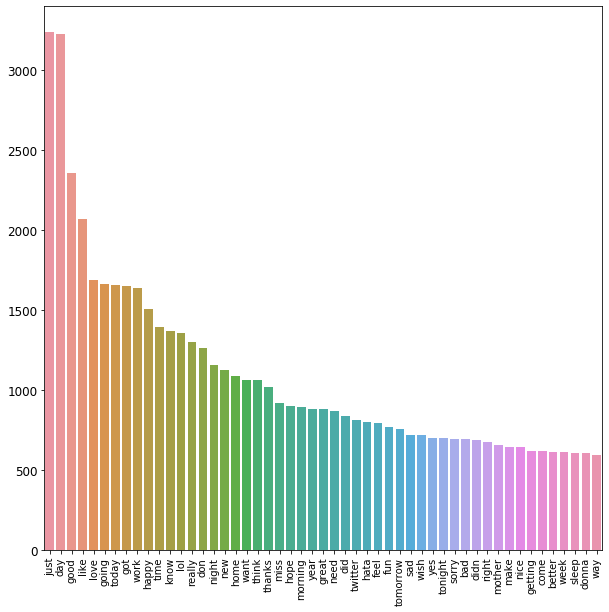

In [27]:
freq = words_freq[:51]
x_axis = [w for n, w in freq]
y_axis = [n for n, w in freq]

plt.figure(figsize=(10, 10))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
sns.barplot(x = x_axis, y = y_axis)

En el gráfico tenemos que las palabras más comunes después de aplicar countvectorizer (lo que difieren ,en parte, de las palabras que vimos antes de aplicar countvectorizer). Vemos que las palabras más comunes tienen que ver con el tiempo, como day, today, time y con sentimientos, como love, good y happy. Estas palabras, como vimos anteriormente en el análisis exploratorio, tienen una identificación clara de positivismo o negativismo. A continuación implementaremos modelos de clasificación que podrán predecir cuándo un tweet es negativo o positivo.

## <u>Modelación.</u>

En esta sección realizaremos lo siguiente:
* Cinco modelos vainilla de clasificación y sus reportes de métrica respectivos.
* Búsqueda de los mejores hiperparámetros con GridSearchCV a los 5 modelos anteriores junto a sus metricas  de desempeño respectivos. 
* Serialización al mejor modelo que cumpla con el benchmark requerido.
* Conclusiones finales.

## I. Modelos Vainilla

En esta etapa se realizarán distintos modelos que responden a la problemática de clasificar un tweet entre positivo o negativo. De esta manera y para fines prácticos se busca realizar cinco modelos distintos que responden a cinco algoritmos distintos, pero todos intentarán resolver la misma problemática. Los modelos serán de tipo vainilla, es decir, utilizaremos los parámetros que vienen por defecto en el modelo.<br>
Después de efectuar los modelos, vamos a refactorizar para mejorar su capacidad predictiva utilizando GridSearchCV y luego vamos a volver a evaluarlos para quedarnos así con el modelo que pueda resolver de mejor manera la problemática mencionada.

In [28]:
# Dividimos los datos en train y test

y = df["sentiment"].astype('int')
X = df["content"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=14846)

### Árboles de decisión

In [29]:
# Definimos el modelo

clf_tree = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', DecisionTreeClassifier())])

In [30]:
# Entrenamos el modelo.

clf_tree.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', DecisionTreeClassifier())])

In [31]:
# Implementamos una predicción sobre test y calculamos su desempeño.

y_hat = clf_tree.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      6728
           1       0.61      0.59      0.60      6472

    accuracy                           0.61     13200
   macro avg       0.61      0.61      0.61     13200
weighted avg       0.61      0.61      0.61     13200



### AdaBoost

In [32]:
# Definimos el modelo

clf_adaboost = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', AdaBoostClassifier())])

In [33]:
# Entrenamos el modelo.

clf_adaboost.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', AdaBoostClassifier())])

In [34]:
# Implementamos una predicción sobre test y calculamos su desempeño.

y_hat = clf_adaboost.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.60      0.85      0.71      6728
           1       0.73      0.42      0.53      6472

    accuracy                           0.64     13200
   macro avg       0.67      0.64      0.62     13200
weighted avg       0.67      0.64      0.62     13200



### GradientBoost

In [35]:
# Definimos el modelo

clf_gradientboost = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', GradientBoostingClassifier())])

In [36]:
# Entrenamos el modelo.

clf_gradientboost.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()),
                ('clf', GradientBoostingClassifier())])

In [37]:
# Implementamos una predicción sobre test y calculamos su desempeño.

y_hat = clf_gradientboost.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.61      0.84      0.71      6728
           1       0.73      0.44      0.55      6472

    accuracy                           0.65     13200
   macro avg       0.67      0.64      0.63     13200
weighted avg       0.67      0.65      0.63     13200



### Random Forest

In [38]:
# Definimos el modelo

clf_randomforest = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', RandomForestClassifier())])

In [39]:
# Entrenamos el modelo.

clf_randomforest.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', RandomForestClassifier())])

In [40]:
# Implementamos una predicción sobre test y calculamos su desempeño.

y_hat = clf_randomforest.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      6728
           1       0.67      0.64      0.66      6472

    accuracy                           0.67     13200
   macro avg       0.67      0.67      0.67     13200
weighted avg       0.67      0.67      0.67     13200



### Naive Bayes

In [41]:
# Definimos el modelo

clf_naivebayes = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', BernoulliNB())])

In [42]:
# Entrenamos el modelo.

clf_naivebayes.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', BernoulliNB())])

In [43]:
# Implementamos una predicción sobre test y calculamos su desempeño.

y_hat = clf_naivebayes.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      6728
           1       0.68      0.63      0.65      6472

    accuracy                           0.67     13200
   macro avg       0.67      0.67      0.67     13200
weighted avg       0.67      0.67      0.67     13200



## II. Modelos aplicando GridSearchCV

Ahora que ya observamos el desempeño de nuestros modelos vamos a ver en cuánto pueden mejorar con los hiperparámetros más optimos utilizando GridSearchCV.

### Árboles de decisión

In [44]:
clf_tree_gs = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', DecisionTreeClassifier())])

In [45]:
parameters = {'clf__max_features': ['auto', 'sqrt','log2'],
              'clf__max_depth': np.linspace(10, 1200, 4, dtype = int),
              'clf__min_samples_split': [2, 10, 15]}

tree_grid = GridSearchCV(clf_tree_gs,
                         param_grid = parameters,
                         scoring="precision",
                         cv=5, n_jobs=-1)

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'clf__max_depth': array([  10,  406,  803, 1200]),
                         'clf__max_features': ['auto', 'sqrt', 'log2', None],
                         'clf__min_samples_split': [2, 10, 15]},
             scoring='precision')

In [46]:
print("Los mejores parámetros son:")
bp = tree_grid.best_params_
for k, v in bp.items():
    print("{}: {}".format(k, v))

Los mejores parámetros son:
clf__max_depth: 10
clf__max_features: None
clf__min_samples_split: 2


In [47]:
y_hat = tree_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.57      0.91      0.70      6728
           1       0.75      0.28      0.41      6472

    accuracy                           0.60     13200
   macro avg       0.66      0.59      0.55     13200
weighted avg       0.66      0.60      0.56     13200



### AdaBoost

In [48]:
clf_ab_gs = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', AdaBoostClassifier())])

In [49]:
parameters = {'clf__learning_rate': [0.01, 0.1, 0.5, 1],
              'clf__n_estimators': [50, 100, 500]}
ab_grid = GridSearchCV(clf_ab_gs,
                         param_grid = parameters,
                         cv=5, n_jobs=-1)

ab_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'clf__learning_rate': [0.01, 0.1, 0.5, 1],
                         'clf__n_estimators': [50, 100, 500]})

In [50]:
print("Los mejores parámetros son:")
bp = ab_grid.best_params_
for k, v in bp.items():
    print("{}: {}".format(k, v))

Los mejores parámetros son:
clf__learning_rate: 0.5
clf__n_estimators: 500


In [51]:
y_hat = ab_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70      6728
           1       0.69      0.59      0.64      6472

    accuracy                           0.67     13200
   macro avg       0.67      0.67      0.67     13200
weighted avg       0.67      0.67      0.67     13200



### GradientBoost

In [52]:
clf_gb_gs = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', AdaBoostClassifier())])

In [53]:
%%time
parameters = {'clf__learning_rate': [0.01, 0.1, 0.5],
              'clf__n_estimators': [50, 100, 500]}
gb_grid = GridSearchCV(clf_gb_gs,
                         param_grid = parameters,
                         cv=5, n_jobs=-1)

gb_grid.fit(X_train, y_train)

Wall time: 3min 35s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'clf__learning_rate': [0.01, 0.1, 0.5],
                         'clf__n_estimators': [50, 100, 500]})

In [54]:
print("Los mejores parámetros son:")
bp = gb_grid.best_params_
for k, v in bp.items():
    print("{}: {}".format(k, v))

Los mejores parámetros son:
clf__learning_rate: 0.5
clf__n_estimators: 500


In [55]:
y_hat = gb_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70      6728
           1       0.69      0.59      0.64      6472

    accuracy                           0.67     13200
   macro avg       0.67      0.67      0.67     13200
weighted avg       0.67      0.67      0.67     13200



### Random Forest

In [56]:
clf_rf_gs = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', RandomForestClassifier())])

In [57]:
%%time
parameters = {'clf__max_features': ['auto', 'sqrt','log2'],
              'clf__max_depth': np.linspace(10, 1200, 4, dtype = int)}
rf_grid = GridSearchCV(clf_rf_gs,
                         param_grid = parameters,
                         cv=5, n_jobs=-1)

rf_grid.fit(X_train, y_train)

Wall time: 31min 46s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__max_depth': array([  10,  406,  803, 1200]),
                         'clf__max_features': ['auto', 'sqrt', 'log2']})

In [58]:
print("Los mejores parámetros son:")
bp = rf_grid.best_params_
for k, v in bp.items():
    print("{}: {}".format(k, v))

Los mejores parámetros son:
clf__max_depth: 406
clf__max_features: auto


In [59]:
y_hat = rf_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      6728
           1       0.68      0.61      0.64      6472

    accuracy                           0.67     13200
   macro avg       0.67      0.67      0.67     13200
weighted avg       0.67      0.67      0.67     13200



### Naive Bayes

In [60]:
clf_nv_gs = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', BernoulliNB())])

In [61]:
%%time
parameters = {'clf__alpha': (0.01, 0.1, 1),
              'clf__fit_prior': [True, False],
              'clf__class_prior': (None, 1, 5, 10)}              
nv_grid = GridSearchCV(clf_nv_gs,
                         param_grid = parameters,
                         cv=5, n_jobs=-1)

nv_grid.fit(X_train, y_train)

Wall time: 51.3 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf', BernoulliNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': (0.01, 0.1, 1),
                         'clf__class_prior': (None, 1, 5, 10),
                         'clf__fit_prior': [True, False]})

In [62]:
print("Los mejores parámetros son:")
bp = nv_grid.best_params_
for k, v in bp.items():
    print("{}: {}".format(k, v))

Los mejores parámetros son:
clf__alpha: 1
clf__class_prior: None
clf__fit_prior: True


In [63]:
y_hat = nv_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      6728
           1       0.68      0.63      0.65      6472

    accuracy                           0.67     13200
   macro avg       0.67      0.67      0.67     13200
weighted avg       0.67      0.67      0.67     13200



### III. Serialización del mejor modelo

De los modelos entrenados, tanto en vainilla como en GridSearchCV, hay dos modelos que superan el benchmark. Recordemos que el benchmark es el siguiente:
* Accuracy: 0.63
* Precision (clase 1): 0.72

Los modelos vainilla GradientBoost y AdaBoost superaron estos dos indicadores, teniendo mejores resultados el algoritmo GradientBoost:
* Accuracy: 0.65
* Precision (clase 1): 0.73

A continuación, serializaremos el modelo con la librería joblib.

In [64]:
from joblib import load, dump

dump(clf_gradientboost, "best_model.joblib")
best_model = load("best_model.joblib")

## Conclusiones finales

Para clasificar tweets se necesitan muchas técnicas de procesamientos de lenguaje y es algo bastante complejo, porque el idioma y la forma de comunicarnos es compleja.<br>
Realizando un modelo para poder predecir los sentimientos de un tweet, es decir, si es un sentimiento positivo o negativo, llegué a la conclusión que el mejor modelo para este cometido es GradientBoost que logra una precisión en la clase 1 (positivos) de 0.73 y un accuracy de 0.65, lo que resulta ser un buen modelo a la hora de predecir nuevos datos.
